Bank Customer Churn Prediction

1)	Build a deep learning model to predict churn rate at bank.

2)	Once model is built, print classification report and analyze precision, recall and f1-score


In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


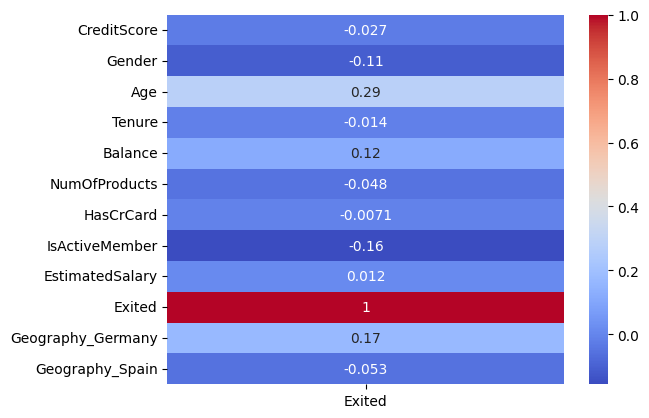

In [ ]:
import seaborn as sns
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix[['Exited']], annot=True, cmap='coolwarm')
plt.show()

Drop irrelevant columns

In [ ]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

Encode categorical variables

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data = pd.get_dummies(data, columns=['Geography'], drop_first=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

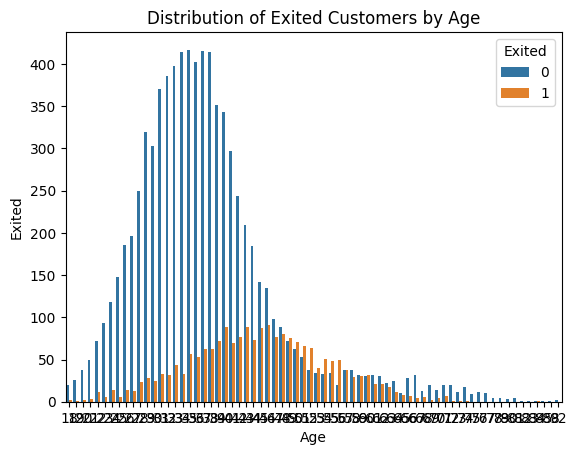

In [ ]:
sns.countplot(x='Age', hue='Exited', data=data)
plt.title('Distribution of Exited Customers by Age')
plt.xlabel('Age')
plt.ylabel('Exited')
plt.show()

Split the data

In [ ]:
X = data['Tenure']
y = data['Exited']

Bar chart

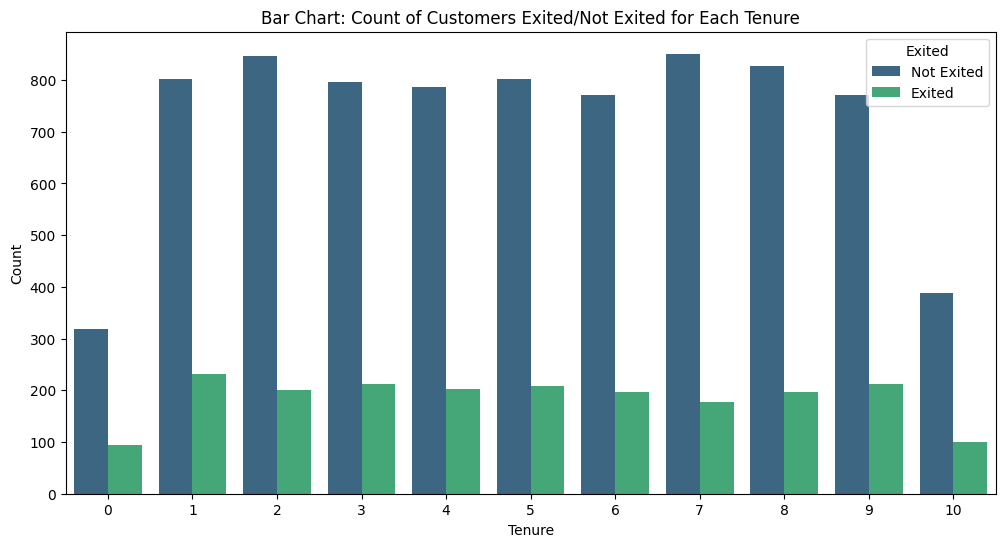

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Tenure', hue='Exited', data=data, palette='viridis')
plt.title('Bar Chart: Count of Customers Exited/Not Exited for Each Tenure')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Exited', 'Exited'])
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [ ]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Model

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
175/175 [==============================] - 2s 4ms/step - loss: 0.5338 - accuracy: 0.7950 - val_loss: 0.5044 - val_accuracy: 0.8079
Epoch 2/10
175/175 [==============================] - 1s 4ms/step - loss: 0.5140 - accuracy: 0.7950 - val_loss: 0.4924 - val_accuracy: 0.8079
Epoch 3/10
175/175 [==============================] - 1s 3ms/step - loss: 0.5112 - accuracy: 0.7950 - val_loss: 0.4950 - val_accuracy: 0.8079
Epoch 4/10
175/175 [==============================] - 1s 3ms/step - loss: 0.5097 - accuracy: 0.7950 - val_loss: 0.4929 - val_accuracy: 0.8079
Epoch 5/10
175/175 [==============================] - 1s 3ms/step - loss: 0.5103 - accuracy: 0.7950 - val_loss: 0.4908 - val_accuracy: 0.8079
Epoch 6/10
175/175 [==============================] - 0s 3ms/step - loss: 0.5091 - accuracy: 0.7950 - val_loss: 0.4907 - val_accuracy: 0.8079
Epoch 7/10
175/175 [==============================] - 0s 3ms/step - loss: 0.5109 - accuracy: 0.7950 - val_loss: 0.4936 - val_accuracy: 0.8079
Epoch 

Model Prediction

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2380
           1       0.00      0.00      0.00       620

    accuracy                           0.79      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.79      0.70      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy=model.evaluate(X_test,y_pred)
accuracy

94/94 [==============================] - 0s 3ms/step - loss: 0.2040 - accuracy: 1.0000


[0.20400972664356232, 1.0]